# Text Classification using Naive Bayes and Sentiment Analysis
In this notebook, we will work on the 'blogs_categories.csv' dataset to build a text classification model using the Naive Bayes algorithm. We will also perform sentiment analysis on the blog posts to understand the sentiment expressed in the texts.

## Step 1: Data Exploration and Preprocessing

In [17]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
import string

# Load the dataset
blogs_data = pd.read_csv('blogs.csv')

# Display the first few rows
blogs_data.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


Number of samples: 2000
Columns in the dataset: Index(['Data', 'Labels'], dtype='object')


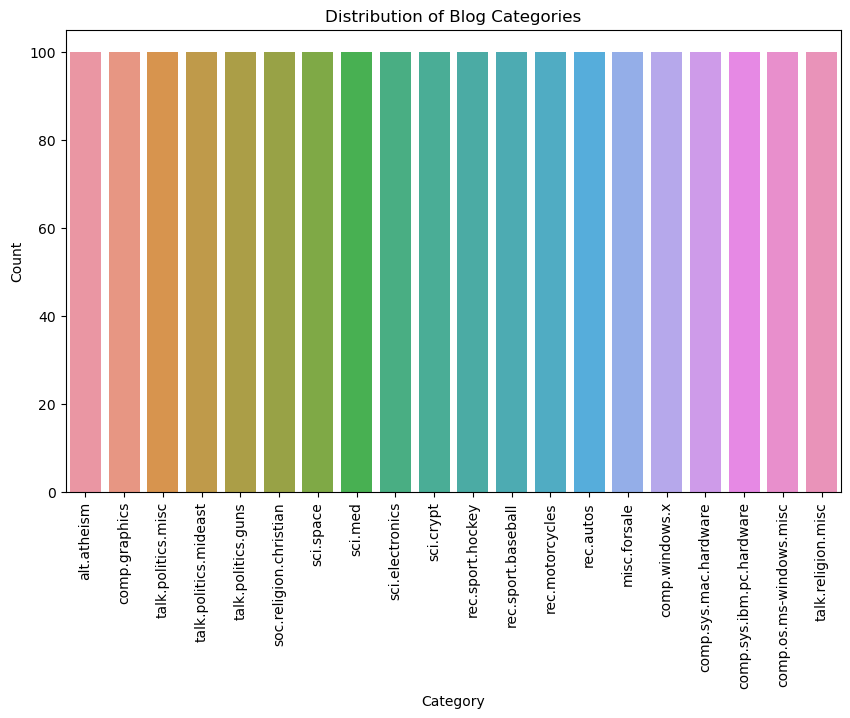

In [18]:
# Summarize the dataset
print("Number of samples:", blogs_data.shape[0])
print("Columns in the dataset:", blogs_data.columns)

# Check the distribution of blog categories
category_counts = blogs_data['Labels'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Distribution of Blog Categories')
plt.ylabel('Count')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.show()

### Data Preprocessing
- Convert text to lowercase
- Remove punctuation
- Tokenize the text
- Remove stopwords

In [19]:
# Define a function to clean and preprocess the text
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(f"[{string.punctuation}]", "", text)
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply the preprocessing to the 'Data' column
blogs_data['cleaned_data'] = blogs_data['Data'].apply(preprocess_text)

# Show the first few rows of cleaned data
blogs_data[['Data', 'cleaned_data']].head()

,Data,cleaned_data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,newsgroups altatheism path cantaloupesrvcscmue...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,xref cantaloupesrvcscmuedu altatheism53485 tal...


In [20]:
# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(blogs_data['cleaned_data'])

# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(blogs_data['Labels'])

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of training and test sets
X_train.shape, X_test.shape

((1600, 5000), (400, 5000))

## Step 2: Naive Bayes Model for Text Classification

In [21]:
# Import necessary libraries for Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Train a Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate a classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 82.50%
                          precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.83      0.83      0.83        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.76      0.76      0.76        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       0.91      0.84      0.87        25
            misc.forsale       0.82      0.78      0.80        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.77      0.94      0.85        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.95      0.95      0.95        19
         sci.electronics       0.62      0.62      0.62        16
                 sci.med       0.88      0.88      0.88   

## Step 3: Sentiment Analysis

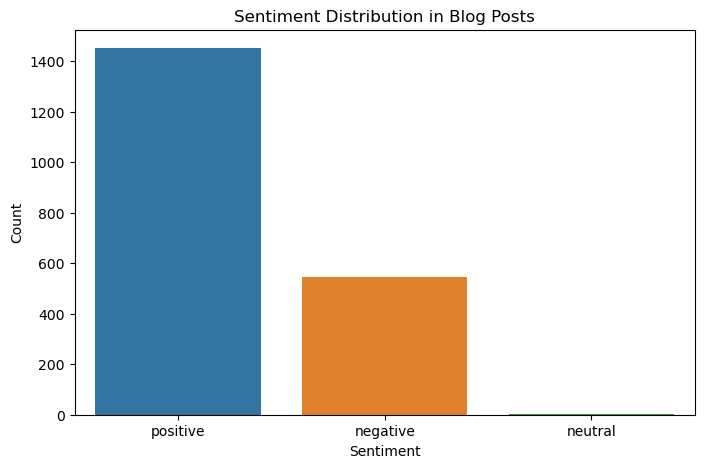

In [22]:
# Sentiment Analysis using TextBlob
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    if blob.sentiment.polarity > 0:
        return "positive"
    elif blob.sentiment.polarity < 0:
        return "negative"
    else:
        return "neutral"

# Apply sentiment analysis to the blog posts
blogs_data['sentiment'] = blogs_data['cleaned_data'].apply(get_sentiment)

# Display the sentiment distribution
sentiment_counts = blogs_data['sentiment'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution in Blog Posts')
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.show()

## Step 4: Evaluation

In [23]:
# Examine the performance of Naive Bayes Classifier
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Sentiment Analysis Summary
print("Sentiment Distribution:")
print(sentiment_counts)

Model Accuracy: 82.50%
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.83      0.62        18
           1       0.83      0.83      0.83        18
           2       0.86      0.82      0.84        22
           3       0.76      0.76      0.76        25
           4       0.83      0.90      0.86        21
           5       0.91      0.84      0.87        25
           6       0.82      0.78      0.80        18
           7       0.89      0.94      0.92        18
           8       0.94      0.94      0.94        16
           9       0.77      0.94      0.85        18
          10       0.88      1.00      0.94        15
          11       0.95      0.95      0.95        19
          12       0.62      0.62      0.62        16
          13       0.88      0.88      0.88        17
          14       1.00      0.86      0.92        21
          15       0.88      0.96      0.92        23
          16       0.85      0.79 